# Analise exploratoria dos dados disponibilizados

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df = pd.read_csv('Gastos_Publicidade_MelhoresCompras.csv')
df.head()

,Ano,Mes,Tipo de Midia,Gastos com Publicidade (em R$),Previsao Inicial de Aumento de Vendas (em mil unidades)
0,2022,1,Paginas web,87000,1000
1,2022,1,Redes sociais,120000,800
2,2022,1,TV,250000,1500
3,2022,1,Jornal,110000,730
4,2022,1,Revista,40000,360


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Ano                                                      200 non-null    int64  
 1   Mes                                                      200 non-null    int64  
 2   Tipo de Midia                                            200 non-null    object 
 3   Gastos com Publicidade (em R$)                           200 non-null    float64
 4   Previsao Inicial de Aumento de Vendas (em mil unidades)  200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


In [6]:
df['Gastos com Publicidade (em R$)'] = df['Gastos com Publicidade (em R$)'].str.replace(",", ".").astype(float)

In [7]:
df.describe()

,Ano,Mes,Gastos com Publicidade (em R$),Previsao Inicial de Aumento de Vendas (em mil unidades)
count,200.000000,200.000000,200.000000,200.000000
mean,2022.920000,5.810000,156151.314000,1655.360000
std,0.797987,3.327048,75946.108386,1106.972207
min,2022.000000,1.000000,11000.000000,200.000000
25%,2022.000000,3.000000,100800.000000,822.000000
50%,2023.000000,5.500000,139550.000000,1400.000000
75%,2024.000000,8.250000,203700.000000,2132.000000
max,2024.000000,12.000000,335664.000000,5310.000000


In [13]:
df.describe(include = 'object')

,Tipo de Midia
count,200
unique,8
top,Paginas web
freq,31


<Axes: xlabel='Previsao Inicial de Aumento de Vendas (em mil unidades)'>

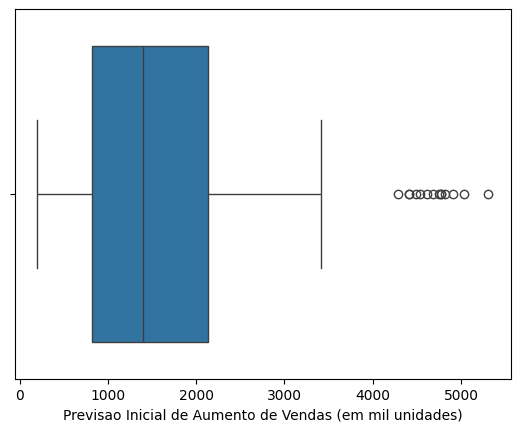

In [17]:
sns.boxplot(x = df['Previsao Inicial de Aumento de Vendas (em mil unidades)'])

<Axes: xlabel='Gastos com Publicidade (em R$)'>

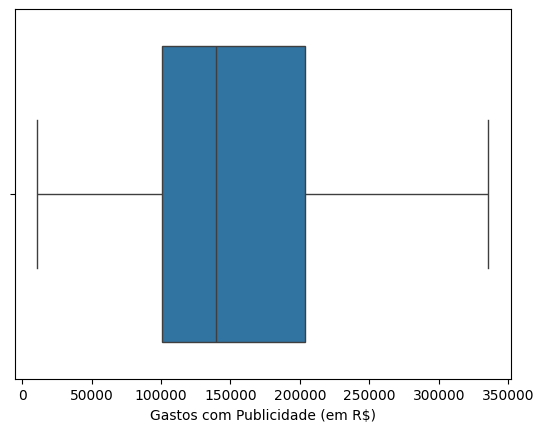

In [16]:
sns.boxplot(x = df['Gastos com Publicidade (em R$)'])

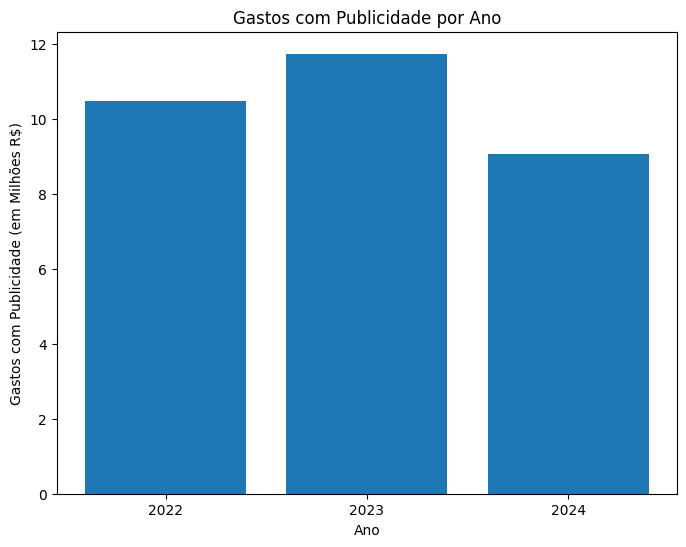

In [87]:
gastos = df.groupby('Ano').sum()['Gastos com Publicidade (em R$)']
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(gastos.index, (gastos.values / 1000000))  
ax.set_xticks(gastos.index)
ax.set_xlabel('Ano')
ax.set_ylabel('Gastos com Publicidade (em Milhões R$)')
ax.set_title('Gastos com Publicidade por Ano')

plt.show() 

(array([18993., 19083., 19174., 19266., 19358., 19448., 19539., 19631.,
        19723., 19814., 19905.]),
 [Text(18993.0, 0, '2022-01'),
  Text(19083.0, 0, '2022-04'),
  Text(19174.0, 0, '2022-07'),
  Text(19266.0, 0, '2022-10'),
  Text(19358.0, 0, '2023-01'),
  Text(19448.0, 0, '2023-04'),
  Text(19539.0, 0, '2023-07'),
  Text(19631.0, 0, '2023-10'),
  Text(19723.0, 0, '2024-01'),
  Text(19814.0, 0, '2024-04'),
  Text(19905.0, 0, '2024-07')])

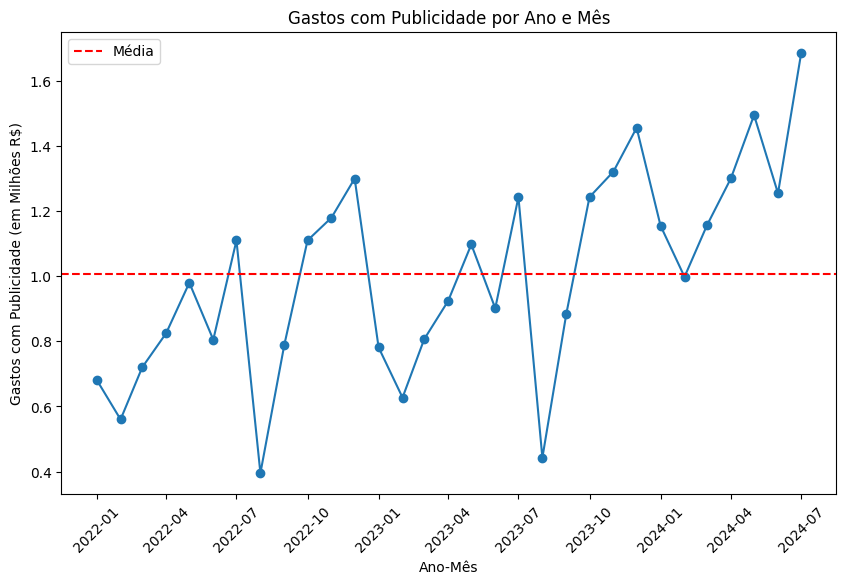

In [88]:
gastos_mensais = df.groupby(['Ano', 'Mes']).sum(numeric_only=True)['Gastos com Publicidade (em R$)']

gastos_mensais = gastos_mensais.reset_index()
gastos_mensais['Data'] = pd.to_datetime(gastos_mensais['Ano'].astype(str) + '-' + gastos_mensais['Mes'].astype(str) + '-01') # Define o primeiro dia do mês como padrão
gastos_mensais.set_index('Data', inplace=True)


fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(gastos_mensais.index, (gastos_mensais['Gastos com Publicidade (em R$)'] / 1000000), marker='o')

ax.axhline(y = gastos_mensais['Gastos com Publicidade (em R$)'].mean() / 1000000, color='red', linestyle='--', label= 'Média')

# Formatando o eixo x para mostrar ano e mês
ax.set_xlabel('Ano-Mês')
ax.set_ylabel('Gastos com Publicidade (em Milhões R$)')
ax.set_title('Gastos com Publicidade por Ano e Mês')
plt.legend()

plt.xticks(rotation=45)

Text(0.5, 1.0, 'Gastos com Publicidade por Tipo de Midia')

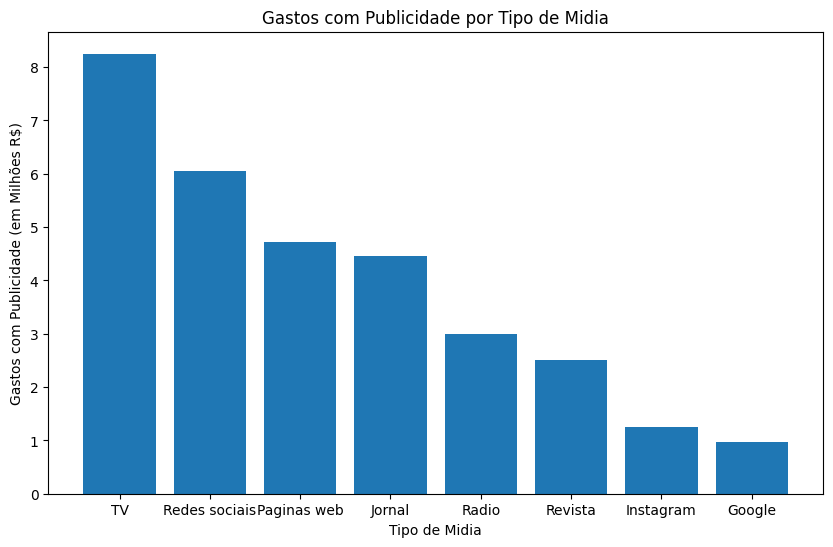

In [85]:
gasto_por_midia = df.groupby('Tipo de Midia').sum()['Gastos com Publicidade (em R$)']

gasto_por_midia = gasto_por_midia.sort_values(ascending= False)
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(gasto_por_midia.index, (gasto_por_midia.values / 1000000))

# Formatando o eixo x para mostrar ano e mês
ax.set_xlabel('Tipo de Midia')
ax.set_ylabel('Gastos com Publicidade (em Milhões R$)')
ax.set_title('Gastos com Publicidade por Tipo de Midia')


# Preparação das features

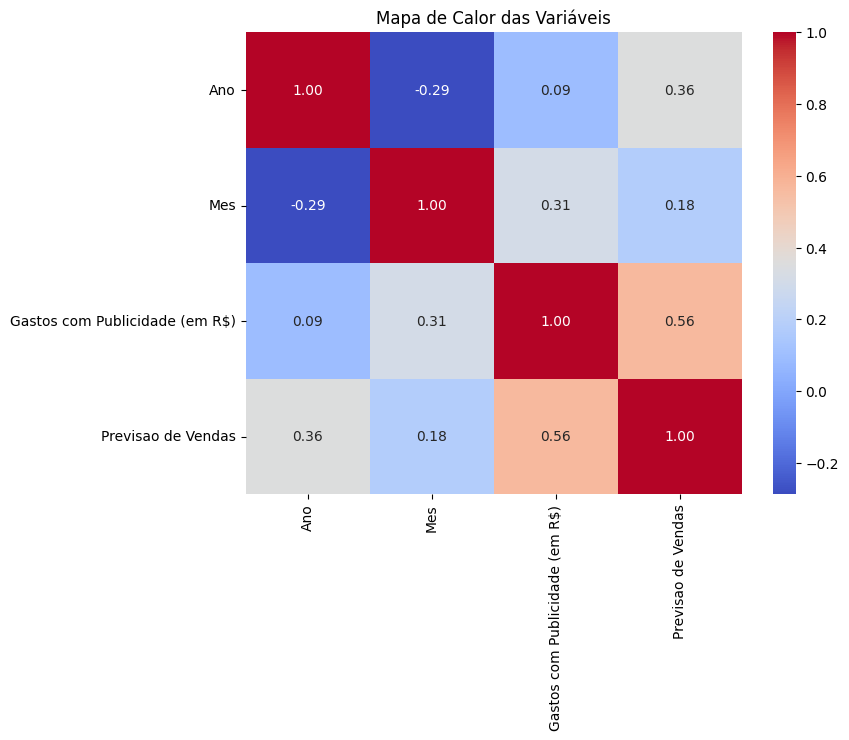

In [92]:
df.rename(columns={'Previsao Inicial de Aumento de Vendas (em mil unidades)': 'Previsao de Vendas'}, inplace=True)
corr = df.corr(numeric_only=True)

# Criando o mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

# Configurando o título do gráfico
plt.title('Mapa de Calor das Variáveis')
plt.show()

In [99]:
df['Tipo de Midia'].unique()

array(['Paginas web', 'Redes sociais', 'TV', 'Jornal', 'Revista', 'Radio',
       'Instagram', 'Google'], dtype=object)

In [111]:
categorias = {"Paginas web": 1, "Redes sociais": 2, "TV": 3, "Jornal": 4, "Revista": 5, "Radio": 6, "Instagram": 7, "Google": 8}

df['Tipo de Midia'] = df['Tipo de Midia'].map(categorias)
df.head()

,Ano,Mes,Tipo de Midia,Gastos com Publicidade (em R$),Previsao Inicial de Aumento de Vendas (em mil unidades)
0,2022,1,1,87000,1000
1,2022,1,2,120000,800
2,2022,1,3,250000,1500
3,2022,1,4,110000,730
4,2022,1,5,40000,360


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Ano                                                      200 non-null    int64 
 1   Mes                                                      200 non-null    int64 
 2   Tipo de Midia                                            200 non-null    int64 
 3   Gastos com Publicidade (em R$)                           200 non-null    object
 4   Previsao Inicial de Aumento de Vendas (em mil unidades)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [117]:
df['Gastos com Publicidade (em R$)'] = df['Gastos com Publicidade (em R$)'].str.replace(",", ".").astype(float)

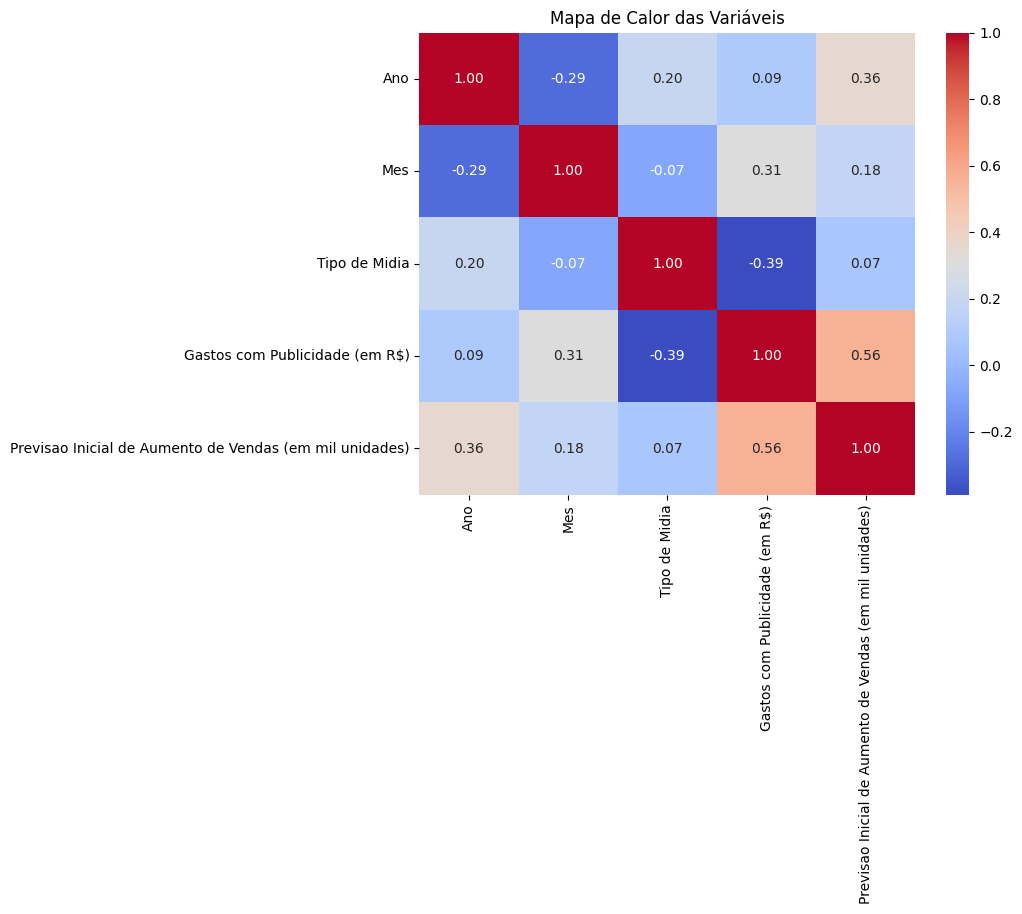

In [118]:
corr = df.corr(numeric_only=True)

# Criando o mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

# Configurando o título do gráfico
plt.title('Mapa de Calor das Variáveis')
plt.show()